<a href="https://colab.research.google.com/github/Sardar-moazzam10/PIAIC_Assignment/blob/main/langchainragpoject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lang Chain Rag Project

In [ ]:
#installing  required packages
#we use chromodb as vector datbase as pinecone represet a server error
%pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.8 MB/s eta 0:00:0

In [ ]:
#set google api key here
from google.colab import userdata
GEMINI_API_KEY=userdata.get('GOOGLE_API_KEY')


In [ ]:
#install more dependies for langchain ecosysytem
!sudo apt -y -qq install tesseract-ocr libtesseract-dev
!sudo apt-get -y -qq install poppler-utils libxml2-dev libxlt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr
!pip install langchain

The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123634 files and directories

In [ ]:
#install langchain community  for PyPDFLoader or RecursiveCharacterTextSplitter
!pip install -U langchain-community

Chat with Documents using RAG (Retreival Augment Generation)

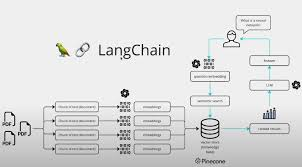

In [ ]:
#show a pic of langchae process text-->chunks-->emded process than give info
import PIL.Image

img = PIL.Image.open('/content/images.jpg')
img

In [ ]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA



warnings.filterwarnings("ignore")
# restart python kernal if issues with langchain import.

In [14]:
#install pakage for required llm
#we use gemini
from langchain_google_genai import ChatGoogleGenerativeAI





In [16]:
#LLM
model = ChatGoogleGenerativeAI(model="gemini-pro",google_api_key=GEMINI_API_KEY,temperature=0.2,convert_system_message_to_human=True)

Extract text from the PDF
# New Section

In [37]:
# make a pdfLoder that lode a pdf from file
pdf_loader = PyPDFLoader("/content/attention-is-all-you-need-Paper.pdf")
#split tha whole pdf inro pages
pages = pdf_loader.load_and_split()
#get page no 1
page1=(pages[1].page_content)
print("\n Page1 : \n ",page1)
#get page no 3
page3 = (pages[3].page_content)
print("\n Page3 : \n",page3)


 Page1 : 
  Recurrent models typically factor computation along the symbol positions of the input and output
sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden
states ht, as a function of the previous hidden state ht−1 and the input for position t. This inherently
sequential nature precludes parallelization within training examples, which becomes critical at longer
sequence lengths, as memory constraints limit batching across examples. Recent work has achieved
signiﬁcant improvements in computational efﬁciency through factorization tricks [18] and conditional
computation [26], while also improving model performance in case of the latter. The fundamental
constraint of sequential computation, however, remains.
Attention mechanisms have become an integral part of compelling sequence modeling and transduc-
tion models in various tasks, allowing modeling of dependencies without regard to their distance in
the input or output sequences [2, 16]

In [20]:
#give total number of pdf pages length
len(pages)

12

RAG Pipeline: Embedding + Gemini (LLM)

In [38]:
#Embedding
from langchain_google_genai import GoogleGenerativeAIEmbeddings

#chunking
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=1000)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)


embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GEMINI_API_KEY)

#Store chunks in chromadb
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k":5})

In [42]:
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True

)


question = "Describe the Multi-head attention layer in detail?"
result = qa_chain({"query": question})
result["result"]


'Multi-head attention allows the model to jointly attend to information from different representation\nsubspaces at different positions. With a single attention head, averaging inhibits this.\nMultiHead(Q,K,V ) = Concat(head1,..., headh)WO\nwhere headi = Attention(QWQ\ni ,KW K\ni ,VW V\ni )\nWhere the projections are parameter matricesWQ\ni ∈Rdmodel×dk , WK\ni ∈Rdmodel×dk , WV\ni ∈Rdmodel×dv\nand WO ∈Rhdv×dmodel .\nIn this work we employ h = 8 parallel attention layers, or heads. For each of these we use\ndk = dv = dmodel/h= 64. Due to the reduced dimension of each head, the total computational cost\nis similar to that of single-head attention with full dimensionality.'

In [26]:
print(result["result"])


Multi-head attention allows the model to jointly attend to information from different representation subspaces at different positions. With a single attention head, averaging inhibits this.

Instead of performing a single attention function with dmodel-dimensional keys, values and queries, we found it beneficial to linearly project the queries, keys and values h times with different, learned linear projections to dk, dk and dv dimensions, respectively. On each of these projected versions of queries, keys and values we then perform the attention function in parallel, yielding dv-dimensional output values. These are concatenated and once again projected, resulting in the final values, as depicted in Figure 2.

MultiHead(Q,K,V ) = Concat(head1,..., headh)WO
where headi = Attention(QWQ
i ,KW K
i ,VW V
i )
Where the projections are parameter matricesWQ
i ∈Rdmodel×dk , WK
i ∈Rdmodel×dk , WV
i ∈Rdmodel×dv
and WO ∈Rhdv×dmodel .

In this work we employ h = 8 parallel attention layers, or heads.

In [45]:
question="Why Self-Attention"
result = qa_chain({"query": question})
print(result["result"])

Self-attention is a type of attention mechanism that allows a model to attend to different parts of its own input sequence. This is in contrast to encoder-decoder attention, which allows a model to attend to different parts of the input and output sequences. Self-attention is particularly useful for tasks such as language modeling and machine translation, where the model needs to be able to attend to long-range dependencies in the input sequence. Thanks for asking!


In [43]:
#set a template
template = """Based on the context provided below, answer the question at the end. If the answer is unknown, acknowledge it without guessing or fabricating an answer. Keep your response brief and end it with 'Thanks for asking!'
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)# Run chain
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)


In [44]:
#if query not present than check responce
question = "Describe Random forest?"
result = qa_chain({"query": question})
print(result["result"])

I'm sorry, but the provided context does not mention anything about Random forest, so I cannot answer this question from the provided context. Thanks for asking!
